### Two pieces splitting algorithm 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns

In [2]:
df1 = pd.read_excel('GenProd100_21.xlsx',header=None, engine='openpyxl')

# Combine lines in one chain
Shortord_text = ''.join(df1.astype(str).values.flatten())
# have a list then
Shortord_text = Shortord_text.replace('\n', '').replace('\r', '').strip()

ShortWordLengths = ast.literal_eval(Shortord_text)
Shortlen= [entry[2] for entry in ShortWordLengths]

In [3]:
#Length(word)-Length(shortenedword).
def difference(lst):
    dif_list=[]
    for sublist in lst:
        newsublist=[x - sublist[2] for x in sublist[1]]
        dif_list.append(newsublist)
    return dif_list
print(difference(ShortWordLengths))

[[26, 10, 10, 26, 26, 26, 26, 2, 26, 10, 26, 0, 22, 26, 20, 26, 26, 26, 26, 26, 26, 26, 26, 26, 22, 14, 26, 26, 26, 26, 14, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 4, 26, 26, 26, 26, 26, 26, 26, 26, 26, 14], [22, 0, 8, 14, 22, 18, 22, 22, 22, 22, 22, 22, 12, 20, 6, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 20, 22, 22, 22, 22, 22, 22, 12, 22, 22, 22, 22, 22, 12, 8, 20, 20, 20, 22, 22, 16, 22], [22, 22, 22, 6, 8, 8, 12, 16, 22, 14, 14, 22, 22, 22, 14, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 

In [4]:
def indicator_of_list_p_q_right(lst,p,q):
    # Prepare a list for the binary sequence
    binary_sequence = []
    # Loop through each entry in ShortWordLengths
    for entry in lst:
        Lengths = entry[1]  # All but the last element (best word length)
        L_prime = entry[2]  # The last element is the best word length
        L=entry[0]
        D=L_prime + p * (L - L_prime)
        
        # Compare word length with best word length
        binary_indicator = [0 if word_len > D else 1 for word_len in Lengths]
        binary_sequence.append(binary_indicator)
    return binary_sequence
indicators=indicator_of_list_p_q_right(ShortWordLengths, 0.4, 0.2)
print(indicators[:2])

[[0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]


In [5]:
def indicator_of_list_chi(lst, p):
    binary_sequence = []

    for entry in lst:
        L = entry[0]
        Lengths = entry[1]
        L_prime = entry[2]

        K = L_prime+p*(L-L_prime) # Maximum allowed distance from L' to be considered "shorter"
        binary_indicator = []

        for l_i in Lengths:
            diff = l_i - L_prime
            if 0 <= diff <= K-L_prime:
                binary_indicator.append(1)  # χ_K is 1
            else:
                binary_indicator.append(0)  # χ_K is 0

        binary_sequence.append(binary_indicator)
    return binary_sequence
# Example usage:
indicators = indicator_of_list_chi(ShortWordLengths, 1)
print(indicators[:2])


[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


In [6]:
def Probability_range(lst, p, x, t):
    seq1 = indicator_of_list_chi(lst, p)  # Indicator sequences
    sequence_of_votes = []
    
    for i, entry in enumerate(seq1):
        original_entry = lst[i]
        L = original_entry[0]
        L_prime = original_entry[2]
        K = L_prime + p * (L - L_prime)
        if x + t > 1:
            continue  # skip if range exceeds length

        a = int(x * L)
        b = int((x + t) * L)

        # Handle case when a == b: pick single entry
        if  a ==0 and b>a:
            section=entry[0:b-1]
        elif a>0 and a == b  :
            section = [entry[a-1]] if a < len(entry) else [int(K==L)] 
        elif a == b ==0 or a>=K :
            section= [int(K==L)]
        elif b>=L and a !=b:
            section=entry[a-1: b-1]
        else:
            section = entry[a-1:b-1]
        if sum(section) > 0:
            sequence_of_votes.append(1)
        else:
            sequence_of_votes.append(0)
    return sum(sequence_of_votes) / len(lst)

In [7]:
def Probability_range(lst, p, x, t):
    seq1 = indicator_of_list_chi(lst, p)  # Indicator sequences
    sequence_of_votes = []
    
    for i, entry in enumerate(seq1):
        original_entry = lst[i]
        L = original_entry[0]
        L_prime = original_entry[2]
        K = L_prime + p * (L - L_prime)
        # Define the range [a, b] around x
        a = int((x - 0.5 * t) * L)
        b = int((x + 0.5 * t) * L)

        if a > 0:
            a = a - 1  # adjust for indexing

        # Select the section of the word based on a and b
        if a == 0 and b > a:
            section = entry[0:b - 1]
        elif a == b and a > 0:
            section = entry[a - 1]
        elif a == b == 0:
            section = [int(K == L)]
        else:
            section = entry[a - 1:b - 1]

        # Check if the section contains a reduction
        if sum(section) > 0:
            sequence_of_votes.append(1)
        else:
            sequence_of_votes.append(0)

    return sum(sequence_of_votes) / len(lst)


In [9]:
def Probability_range_vraie_version(lst, p, x, t):
    seq1 = indicator_of_list_chi(lst, p)  # Indicator sequences
    sequence_of_votes = []

    for i, entry in enumerate(seq1):
        original_entry = lst[i]
        L = original_entry[0]
        L_prime = original_entry[2]
        K = L_prime + p * (L - L_prime)

        a = (x - 0.5 * t) * L
        b = (x + 0.5 * t) * L
        int_indices = list(range(int(np.floor(a)) + 1, int(np.ceil(b))))

        if not int_indices:
            # No indices in the interval: treat boundary cases
            if K == L:
                section = [1]
            else:
                section = [0]
        else:
            entry_len = len(entry)
            valid_indices = [i for i in int_indices if 1 <= i <= entry_len]
            section = [entry[i - 1] for i in valid_indices]

        if sum(section) > 0:
            sequence_of_votes.append(1)
        else:
            sequence_of_votes.append(0)

    if not sequence_of_votes:
        return 0  # Avoid division by zero
    return sum(sequence_of_votes) / len(lst)

### best plot for a = (x-0.5t)L & b = (x+0.5t)L

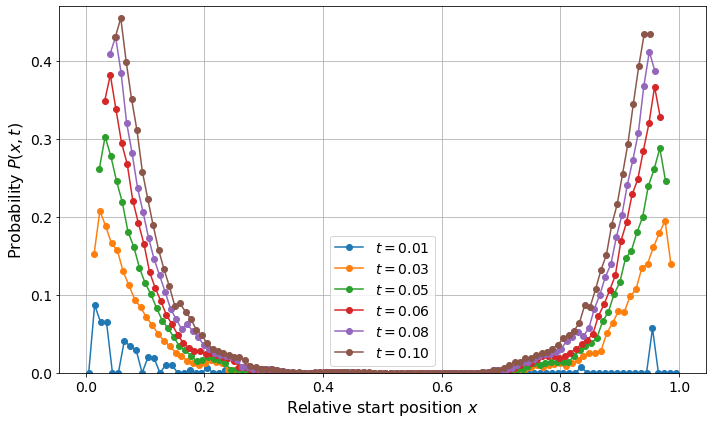

In [12]:
t_values = np.linspace(0.01, 0.1, 6)
p = 0.01
plt.figure(figsize=(10, 6))

for t in t_values:
    x_values = np.linspace(0.5 * t, 1 - 0.5 * t, 100)
    probs = [Probability_range_vraie_version(ShortWordLengths, p, x, t) for x in x_values]
    plt.plot(x_values, probs, marker='o', linestyle='-', label=f"$t = {t:.2f}$")

# Increase font sizes
plt.xlabel("Relative start position $x$", fontsize=16)
plt.ylabel(r"Probability $P(x,t)$", fontsize=16)
# Optional title
# plt.title("Effect of $t$ on $P(x, t)$", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid(True)
plt.ylim(0, 0.47)
plt.tight_layout()
plt.show()


In [13]:
x_values

array([0.05      , 0.05909091, 0.06818182, 0.07727273, 0.08636364,
       0.09545455, 0.10454545, 0.11363636, 0.12272727, 0.13181818,
       0.14090909, 0.15      , 0.15909091, 0.16818182, 0.17727273,
       0.18636364, 0.19545455, 0.20454545, 0.21363636, 0.22272727,
       0.23181818, 0.24090909, 0.25      , 0.25909091, 0.26818182,
       0.27727273, 0.28636364, 0.29545455, 0.30454545, 0.31363636,
       0.32272727, 0.33181818, 0.34090909, 0.35      , 0.35909091,
       0.36818182, 0.37727273, 0.38636364, 0.39545455, 0.40454545,
       0.41363636, 0.42272727, 0.43181818, 0.44090909, 0.45      ,
       0.45909091, 0.46818182, 0.47727273, 0.48636364, 0.49545455,
       0.50454545, 0.51363636, 0.52272727, 0.53181818, 0.54090909,
       0.55      , 0.55909091, 0.56818182, 0.57727273, 0.58636364,
       0.59545455, 0.60454545, 0.61363636, 0.62272727, 0.63181818,
       0.64090909, 0.65      , 0.65909091, 0.66818182, 0.67727273,
       0.68636364, 0.69545455, 0.70454545, 0.71363636, 0.72272

In [14]:
def Probability_first_last_d_p_q(lst, p, q):
    # Generate the indicator sequences using χ_K
    seq1 = indicator_of_list_chi(lst, p)
    sequence_of_votes2 = []

    for i, entry in enumerate(seq1):
        original_entry = lst[i]
        L = original_entry[0]
        d = int(q * L)
        L_prime = original_entry[2]
        K = L_prime + p * (L - L_prime)

        if len(entry) < d:
            raise ValueError(f"One of your indicator lists has a length less than {d}.")

        # First and last d entries of the indicator
        if d == 0:
            # Use neutral test when d = 0
            vote = int(K == L)
        else:
            first_d = entry[:d]
            last_d = entry[-d:]
            vote = 1 if (sum(first_d) + sum(last_d)) > 0 else 0

        sequence_of_votes2.append(vote)

    probability = sum(sequence_of_votes2) / len(lst)
    return probability


In [15]:
Probability_first_last_d_p_q(ShortWordLengths,  0.1, 0.011)
#Probability_fist_d_p_q(ShortWordLengths, 0.5,0.2)
p_values = np.linspace(0, 1, 3)
#x_values = np.linspace(0, 1, 3)
t_values = np.linspace(0, 1, 3)
results = []

for p in p_values:
    for t in t_values:
        x_values=np.linspace(0.5*t, 1-0.5*t, 3)
        for x in x_values:
                probability = Probability_range_vraie_version(ShortWordLengths, p, x-0.5*t,t)
                results.append((p, x,t, probability))

# Create DataFrame
results_df = pd.DataFrame(results, columns=["p", "x","t", "Probability"])
# Pivot for display
#pivot_table = results_df.pivot(index="x", columns="q", values="Probability")
# Display
print(results_df)

      p     x    t  Probability
0   0.0  0.00  0.0        0.000
1   0.0  0.50  0.0        0.000
2   0.0  1.00  0.0        0.000
3   0.0  0.25  0.5        0.542
4   0.0  0.50  0.5        0.547
5   0.0  0.75  0.5        0.010
6   0.0  0.50  1.0        0.547
7   0.0  0.50  1.0        0.547
8   0.0  0.50  1.0        0.547
9   0.5  0.00  0.0        0.000
10  0.5  0.50  0.0        0.000
11  0.5  1.00  0.0        0.000
12  0.5  0.25  0.5        0.888
13  0.5  0.50  0.5        0.893
14  0.5  0.75  0.5        0.074
15  0.5  0.50  1.0        0.893
16  0.5  0.50  1.0        0.893
17  0.5  0.50  1.0        0.893
18  1.0  0.00  0.0        1.000
19  1.0  0.50  0.0        1.000
20  1.0  1.00  0.0        1.000
21  1.0  0.25  0.5        1.000
22  1.0  0.50  0.5        1.000
23  1.0  0.75  0.5        1.000
24  1.0  0.50  1.0        1.000
25  1.0  0.50  1.0        1.000
26  1.0  0.50  1.0        1.000


In [20]:
Probability_first_last_d_p_q(ShortWordLengths,  0.1, 0.011)
#Probability_fist_d_p_q(ShortWordLengths, 0.5,0.2)
p_values = np.linspace(0, 0.6, 7)
q_values = np.arange(0, 0.4, 0.01)
results = []

for p in p_values:
    for q in q_values:
        probability = Probability_first_last_d_p_q(ShortWordLengths, p, q)
        results.append((p.round(3), q.round(3), probability))

# Create DataFrame
results_df = pd.DataFrame(results, columns=["p", "q", "Probability"])
# Pivot for display
pivot_table = results_df.pivot(index="p", columns="q", values="Probability")
# Display
print(results_df)

       p     q  Probability
0    0.0  0.00        0.000
1    0.0  0.01        0.159
2    0.0  0.02        0.288
3    0.0  0.03        0.396
4    0.0  0.04        0.498
..   ...   ...          ...
275  0.6  0.35        1.000
276  0.6  0.36        1.000
277  0.6  0.37        1.000
278  0.6  0.38        1.000
279  0.6  0.39        1.000

[280 rows x 3 columns]


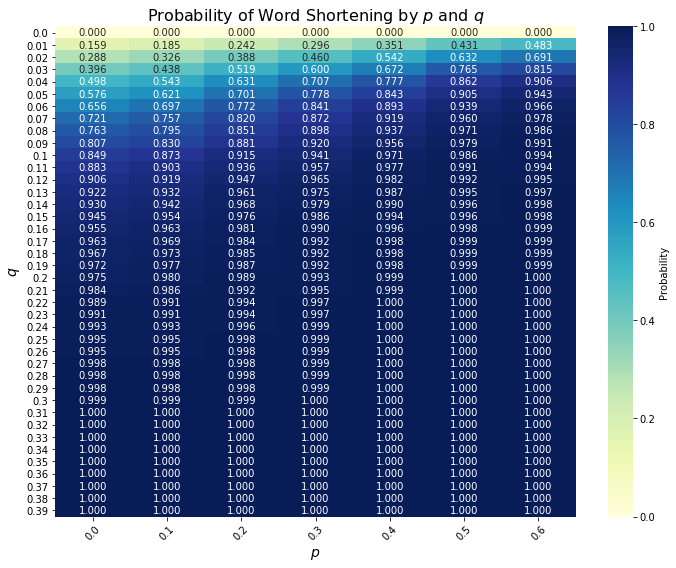

In [21]:
p_values = np.linspace(0, 0.6, 7)
q_values = np.arange(0, 0.4, 0.01)
results = []

for p in p_values:
    for q in q_values:
        probability = Probability_first_last_d_p_q(ShortWordLengths, p, q)
        results.append((p.round(3), q.round(3), probability))

# Create DataFrame
results_df = pd.DataFrame(results, columns=["p", "q", "Probability"])
pivot = results_df.pivot(index='q', columns='p', values='Probability')
pivot=pivot.round(3)
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu", cbar_kws={'label': 'Probability'})

plt.title("Probability of Word Shortening by $p$ and $q$", fontsize=16)
plt.xlabel("$p$", fontsize=14)
plt.ylabel("$q$", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


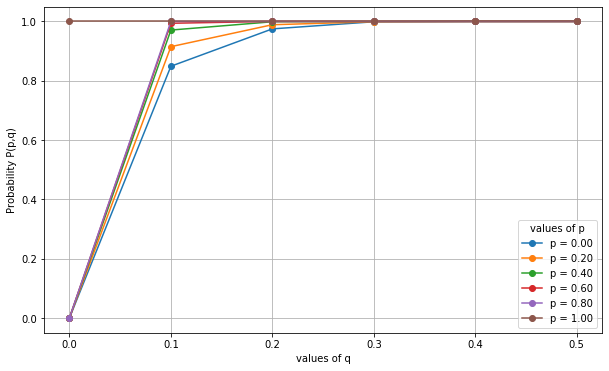

In [23]:
p_values = np.linspace(0, 1, 6)
q_values = np.linspace(0, 0.5, 6)

# Compute probabilities
results = []
for p in p_values:
    for q in q_values:
        prob = Probability_first_last_d_p_q(ShortWordLengths,p, q)  # Replace with real function
        results.append((p, q, prob))

# Create DataFrame
results_df = pd.DataFrame(results, columns=["p", "q", "Probability"])

# Plot: Probability vs q for each fixed p
plt.figure(figsize=(10, 6))
for p in p_values:
    subset = results_df[results_df["p"] == p]
    plt.plot(subset["q"], subset["Probability"], marker='o', label=f"p = {p:.2f}")

#plt.title("Probability of shortening vs q (for various p values)")
plt.xlabel("values of q")
plt.ylabel("Probability P(p,q)")
plt.legend(title="values of p")
plt.grid(True)
plt.show()

##  Second analysis

In [16]:
df2 = pd.read_excel('GenProd100_2.xlsx',header=None, engine='openpyxl')

# Combine lines in one chain
Shortord_text = ''.join(df2.astype(str).values.flatten())
# have a list then
Shortord_text = Shortord_text.replace('\n', '').replace('\r', '').strip()

GenProd = ast.literal_eval(Shortord_text)
print(GenProd)

[[62, 62, 58, 78, 70, 58], [76, 58, 56, 66, 58, 54], [80, 56, 52, 58, 58, 58], [64, 62, 54, 92, 64, 44], [70, 62, 60, 82, 70, 58], [70, 58, 52, 76, 68, 58], [80, 70, 56, 92, 54, 54], [78, 70, 60, 90, 70, 58], [82, 66, 58, 66, 60, 56], [72, 62, 54, 72, 58, 50], [66, 66, 56, 74, 66, 52], [66, 58, 50, 86, 56, 58], [74, 66, 48, 74, 62, 54], [72, 58, 44, 44, 44, 44], [78, 62, 54, 66, 64, 60], [86, 52, 52, 74, 74, 52], [74, 64, 60, 76, 66, 44], [74, 62, 58, 72, 72, 46], [80, 54, 54, 86, 64, 50], [74, 64, 48, 64, 60, 56], [74, 62, 62, 88, 66, 50], [84, 62, 60, 90, 68, 52], [90, 72, 60, 80, 52, 52], [88, 64, 60, 70, 60, 54], [64, 66, 48, 80, 60, 56], [82, 66, 56, 78, 66, 54], [72, 50, 48, 86, 60, 58], [62, 64, 52, 80, 64, 58], [78, 54, 56, 80, 58, 46], [84, 74, 62, 70, 62, 50], [78, 64, 64, 94, 60, 54], [84, 64, 60, 80, 64, 52], [70, 66, 50, 70, 58, 54], [84, 66, 56, 84, 64, 52], [74, 66, 52, 58, 60, 54], [74, 62, 58, 66, 66, 54], [84, 64, 58, 80, 70, 56], [74, 64, 58, 72, 62, 48], [90, 56, 56

##### Print the statistics of this particular algorithm 

In [17]:
Left=[entry[:3] for entry in GenProd]
Right=[entry[-3:] for entry in GenProd]
length= [entry[0] for entry in ShortWordLengths]
Leng=[[length[i]]+GenProd[i] for i in range(len(GenProd))]
#GenProd

In [19]:
import pandas as pd

# Assuming your lists are already defined
Left1 = [l[0] for l in Left]
Left2 = [l[1] for l in Left]
Left3 = [l[2] for l in Left]
Right1 = [l[0] for l in Right]
Right2 = [l[1] for l in Right]
Right3 = [l[2] for l in Right]

# Create a DataFrame for easy statistics
data = {  'Initial':length,
    'Left1': Left1,
    'Left2': Left2,
    'Left3': Left3,
    'Right1': Right1,
    'Right2': Right2,
    'Right3': Right3
}

df = pd.DataFrame(data)

# Compute statistics
summary = df.describe()

# Display the summary table
print(summary)


       Initial        Left1        Left2        Left3       Right1  \
count   1000.0  1000.000000  1000.000000  1000.000000  1000.000000   
mean     100.0    75.890000    63.256000    54.396000    75.598000   
std        0.0     8.386073     5.965404     4.623479     8.650389   
min      100.0    42.000000    40.000000    34.000000    44.000000   
25%      100.0    70.000000    60.000000    52.000000    70.000000   
50%      100.0    76.000000    64.000000    54.000000    76.000000   
75%      100.0    82.000000    68.000000    58.000000    82.000000   
max      100.0   100.000000    80.000000    64.000000    98.000000   

            Right2       Right3  
count  1000.000000  1000.000000  
mean     62.842000    54.084000  
std       6.234573     4.695422  
min      42.000000    34.000000  
25%      60.000000    52.000000  
50%      64.000000    54.000000  
75%      68.000000    58.000000  
max      78.000000    66.000000  


In [20]:
def indicator_of_list_chi2(length,   r):
    binary_sequence = []
    

   # if not isinstance(m, int) or m < 0:
      #  raise ValueError("You should enter a valid positive integer number of generators.")
    if not (0 <= r <= 1):
        raise ValueError("Insert a value of r between 0 and 1.")
    
    for entry in length:
        
        L = entry[0]
        L_prime = r * L
        binary_indicator = []
        
        for l_i in entry:  # L plus first m elements
            if 0 <= l_i <= L_prime:
                binary_indicator.append(1)
            else:
                binary_indicator.append(0)
        
        binary_sequence.append(binary_indicator)
    
    return binary_sequence
indicator_of_list_chi2(Leng , 0.5)

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0,

In [21]:
def Probability_left_right_m(Lenghts, side, m,r):
    indicators=indicator_of_list_chi2(Lenghts,r)
    count=[]
    lis2=[]
    if not isinstance(m, int) or not (0<=m  <= (len(Lenghts[0])-1)//2):
        raise ValueError("You should enter a valid positive integer number of generators.")
    for i, entry in enumerate(indicators):
        n = (len(entry) - 1) // 2
        if side == "Left":
            lis = entry[:m+1]
        elif side == "Right":
            lis = [entry[0]] + entry[n+1:n+m+1] if m>0 else [entry[0]]
        else:
            raise ValueError("The side should be either 'Left' or 'Right' depending on where you applied generators.")
       # for entry2 in lis:
        lis2.append(lis)
    for s in lis2:
        
        if sum(s)>0:
            count.append(1)
        else:
            count.append(0)
    prob=sum(count)/len(Lenghts)
    return prob


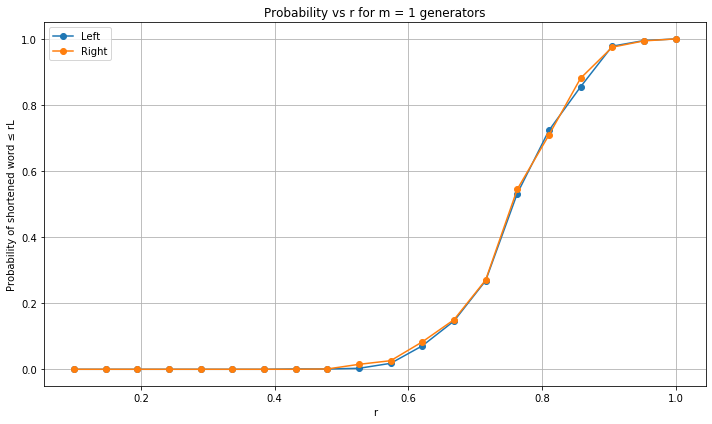

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define range of r values
r_values = np.linspace(0.1, 1, 20)  # r from 0.1 to 1, with 20 points
prob_left = []
prob_right = []

# Fixed m (e.g., number of generators to use)
m = 1

# Loop over r and compute probabilities for each side
for r in r_values:
    prob_left.append(Probability_left_right_m(Leng, 'Left', m, r))
    prob_right.append(Probability_left_right_m(Leng, 'Right', m, r))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_values, prob_left, label='Left', marker='o')
plt.plot(r_values, prob_right, label='Right', marker='o')
plt.xlabel('r')
plt.ylabel('Probability of shortened word ≤ rL')
plt.title(f'Probability vs r for m = {m} generators')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


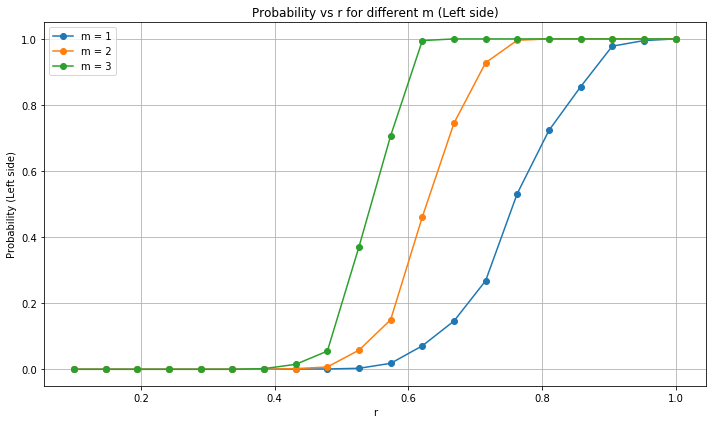

In [23]:
m_values = [1, 2, 3]
r_values = np.linspace(0.1, 1, 20)

plt.figure(figsize=(10, 6))

for m in m_values:
    probs = [Probability_left_right_m(Leng, 'Left', m, r) for r in r_values]
    plt.plot(r_values, probs, label=f'm = {m}', marker='o')

plt.xlabel('r')
plt.ylabel('Probability (Left side)')
plt.title('Probability vs r for different m (Left side)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


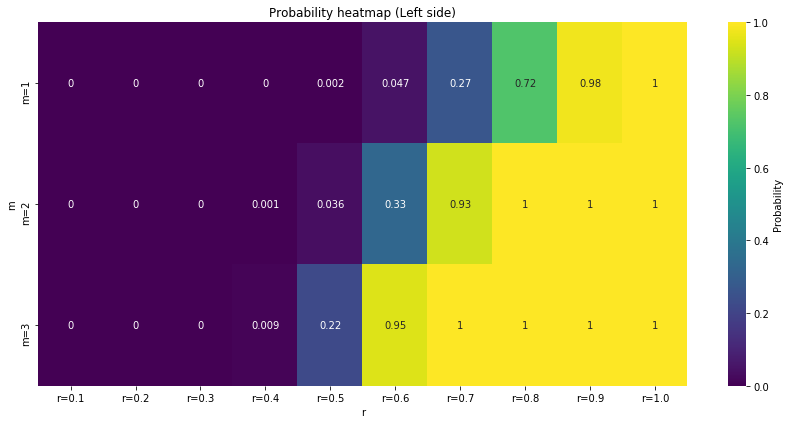

In [24]:
import seaborn as sns
import pandas as pd

m_values = [1, 2, 3]
r_values = np.linspace(0.1, 1.0, 10)
data = []

for m in m_values:
    row = []
    for r in r_values:
        prob = Probability_left_right_m(Leng, 'Left', m, r)
        row.append(prob)
    data.append(row)

# Convert to DataFrame
df_heatmap = pd.DataFrame(data, index=[f"m={m}" for m in m_values], columns=[f"r={round(r,1)}" for r in r_values])

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, annot=True, cmap="viridis", cbar_kws={'label': 'Probability'})
plt.title("Probability heatmap (Left side)")
plt.xlabel("r")
plt.ylabel("m")
plt.tight_layout()
plt.show()


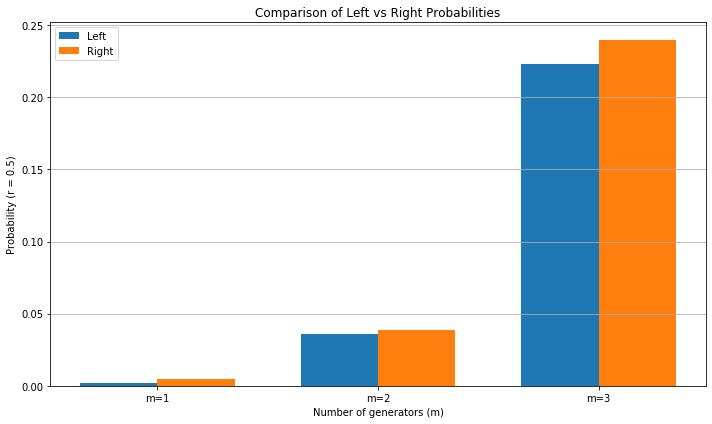

In [25]:
m_values = [1, 2, 3]
r = 0.5
left_probs = [Probability_left_right_m(Leng, 'Left', m, r) for m in m_values]
right_probs = [Probability_left_right_m(Leng, 'Right', m, r) for m in m_values]

x = np.arange(len(m_values))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, left_probs, width, label='Left')
plt.bar(x + width/2, right_probs, width, label='Right')
plt.xticks(x, [f"m={m}" for m in m_values])
plt.xlabel('Number of generators (m)')
plt.ylabel(f'Probability (r = {r})')
plt.title('Comparison of Left vs Right Probabilities')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd
import numpy as np

# Define ranges
m_values = [1, 2, 3]
r_values = np.linspace(0,1,11)
sides = ['Left', 'Right']

# Store results
records = []

for m in m_values:
    for side in sides:
        for r in r_values:
            prob = Probability_left_right_m(Leng, side, m, r)
            records.append({
                'm': m,
                'Side': side,
                'r': r,
                'Probability': prob
            })

# Create DataFrame
df = pd.DataFrame(records)

# Optional: Pivot for better table view (side by side)
pivot_table = df.pivot_table(index=['m', 'r'], columns='Side', values='Probability')

print(pivot_table.round(3))  # Rounded for neatness


Side    Left  Right
m r                
1 0.0  0.000  0.000
  0.1  0.000  0.000
  0.2  0.000  0.000
  0.3  0.000  0.000
  0.4  0.000  0.000
  0.5  0.002  0.005
  0.6  0.047  0.059
  0.7  0.268  0.270
  0.8  0.723  0.709
  0.9  0.978  0.975
  1.0  1.000  1.000
2 0.0  0.000  0.000
  0.1  0.000  0.000
  0.2  0.000  0.000
  0.3  0.000  0.000
  0.4  0.001  0.000
  0.5  0.036  0.039
  0.6  0.332  0.365
  0.7  0.928  0.926
  0.8  1.000  1.000
  0.9  1.000  1.000
  1.0  1.000  1.000
3 0.0  0.000  0.000
  0.1  0.000  0.000
  0.2  0.000  0.000
  0.3  0.000  0.000
  0.4  0.009  0.012
  0.5  0.223  0.240
  0.6  0.949  0.965
  0.7  1.000  1.000
  0.8  1.000  1.000
  0.9  1.000  1.000
  1.0  1.000  1.000


### Mixing two algorithms 

In [27]:
Min_short=[[min([l[i], l[i+3]]) for i in range(3)] for l in GenProd]

GenProd2=[[length[i]]+Min_short[i] for i in range(len(Min_short))]

In [28]:
import pandas as pd

# Assuming you have these lists defined
Gen1 = [l[0] for l in Min_short]
Gen2 = [l[1] for l in Min_short]
Gen3 = [l[2] for l in Min_short]

# Create DataFrame
data = {
    'Initial Length': length,
    '1 Generator': Gen1,
    '2 Generators': Gen2,
    '3 Generators': Gen3,
}

df = pd.DataFrame(data)

# Full summary statistics
summary = df.describe().round(2)

# Display
print(summary)


       Initial Length  1 Generator  2 Generators  3 Generators
count          1000.0      1000.00       1000.00       1000.00
mean            100.0        71.12         59.64         51.71
std               0.0         7.63          5.51          4.27
min             100.0        42.00         40.00         34.00
25%             100.0        66.00         56.00         50.00
50%             100.0        72.00         60.00         52.00
75%             100.0        76.00         64.00         54.00
max             100.0        92.00         74.00         62.00


In [29]:
def indicator_of_list_chi22(length,   r):
    binary_sequence = []
    

   # if not isinstance(m, int) or m < 0:
      #  raise ValueError("You should enter a valid positive integer number of generators.")
    if not (0 <= r <= 1):
        raise ValueError("Insert a value of r between 0 and 1.")
    
    for entry in length:
        
        L = entry[0]
        L_prime = r * L
        binary_indicator = []
        
        for l_i in entry:  # L plus first m elements
            if 0 <= l_i <= L_prime:
                binary_indicator.append(1)
            else:
                binary_indicator.append(0)
        
        binary_sequence.append(binary_indicator)
    
    return binary_sequence
indicator_of_list_chi22(GenProd2 , 0.8)

[[0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 0, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1, 1],
 [0, 1, 1,

In [30]:
def Probability_m_r2(Lenghts,  m,r):
    indicators=indicator_of_list_chi22(Lenghts,r)
    count=[]
    lis2=[]
    if not isinstance(m, int) or m<0:
        raise ValueError("You should enter a valid positive integer number of generators.")
    for i, entry in enumerate(indicators):
        n = (len(entry) - 1) // 2
        lis = entry[m]
        lis2.append(lis)

    prob=sum(lis2)/len(Lenghts)
    return prob
Probability_m_r2(Leng, 2,0.6)

0.319

In [31]:
def Probability_m_r(Lenghts,  m,r):
    indicators=indicator_of_list_chi22(Lenghts,r)
    count=[]
    lis2=[]
    if not isinstance(m, int) or m<0:
        raise ValueError("You should enter a valid positive integer number of generators.")
    for i, entry in enumerate(indicators):
        n = (len(entry) - 1) // 2
        lis = entry[:m+1]
        lis2.append(lis)
    lis2=lis2
    for s in lis2:
        
        if sum(s)>0:
            count.append(1)
        else:
            count.append(0)
    prob=sum(count)/len(Lenghts)
    return prob


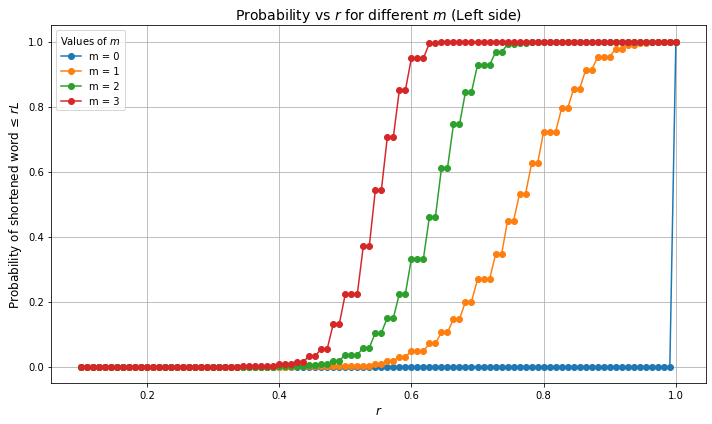

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Définir l'intervalle des valeurs de r
r_values = np.linspace(0.1, 1, 100)  # r de 0.1 à 1, en 20 points

# Liste des valeurs de m à tester
m_values = [0, 1, 2, 3]

# Simuler (ou appeler) la fonction de probabilité pour chaque m et chaque r
# Exemple : on suppose que Probability_left_right_m(L, m, r)[0] donne la probabilité pour "left"
# Tu dois t'assurer que Leng est défini ailleurs dans ton code
#Leng = 100  # ou la longueur moyenne de tes mots, adapte selon ton contexte

plt.figure(figsize=(10, 6))

for m in m_values:
    prob_left = []
    for r in r_values:
        prob = Probability_m_r(Leng, m, r)  # [0] pour left, [1] pour right
        prob_left.append(prob)
    plt.plot(r_values, prob_left, marker='o', label=f'm = {m}')

# Personnalisation du graphique
plt.xlabel('$r$', fontsize=12)
plt.ylabel('Probability of shortened word ≤ $rL$', fontsize=12)
plt.title('Probability vs $r$ for different $m$ (Left side)', fontsize=14)
plt.legend(title='Values of $m$')
plt.grid(True)
plt.tight_layout()
plt.show()


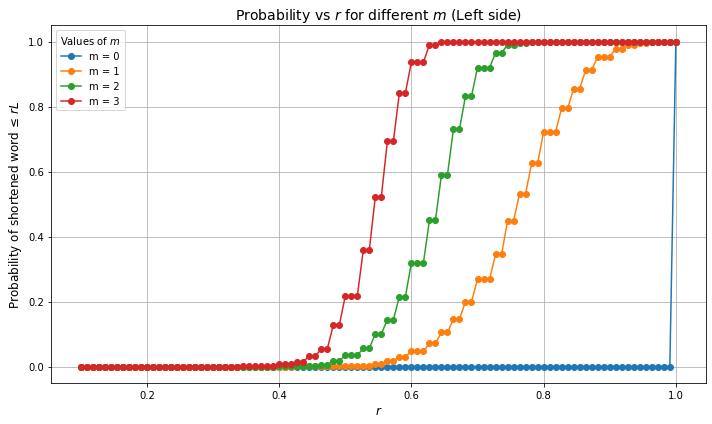

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Définir l'intervalle des valeurs de r
r_values = np.linspace(0.1, 1, 100)  # r de 0.1 à 1, en 20 points

# Liste des valeurs de m à tester
m_values = [0, 1, 2, 3]

plt.figure(figsize=(10, 6))

for m in m_values:
    prob_left = []
    for r in r_values:
        prob = Probability_m_r2(Leng, m, r)  # [0] pour left, [1] pour right
        prob_left.append(prob)
    plt.plot(r_values, prob_left, marker='o', label=f'm = {m}')

# Personnalisation du graphique
plt.xlabel('$r$', fontsize=12)
plt.ylabel('Probability of shortened word ≤ $rL$', fontsize=12)
plt.title('Probability vs $r$ for different $m$ (Left side)', fontsize=14)
plt.legend(title='Values of $m$')
plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
m_values = [0,1, 2, 3]
r_values = np.linspace(0, 1, 11)

# Store results
records = []

for m in m_values:
    for r in r_values:
        prob = Probability_m_r(GenProd2, m, r)  # Supposée renvoyer une seule probabilité
        records.append({
            'm': m,
            'r': r.round(2),
            'Probability': prob
        })

# Create DataFrame
df = pd.DataFrame(records)
# Optional: Pivot for viewing probabilities per m as rows and r as columns
pivot_table = df.pivot(index='m', columns='r', values='Probability')
print(pivot_table.round(3))

r  0.0  0.1  0.2  0.3    0.4    0.5    0.6    0.7    0.8    0.9  1.0
m                                                                   
0  0.0  0.0  0.0  0.0  0.000  0.000  0.000  0.000  0.000  0.000  1.0
1  0.0  0.0  0.0  0.0  0.000  0.006  0.103  0.460  0.909  0.999  1.0
2  0.0  0.0  0.0  0.0  0.001  0.072  0.580  0.997  1.000  1.000  1.0
3  0.0  0.0  0.0  0.0  0.021  0.401  0.999  1.000  1.000  1.000  1.0


#### Probability that a word will not get shortened

In [35]:
def indicator_of_list_chi222(length):
    binary_sequence = []
    

   # if not isinstance(m, int) or m < 0:
      #  raise ValueError("You should enter a valid positive integer number of generators.")
    if not (0 <= r <= 1):
        raise ValueError("Insert a value of r between 0 and 1.")
    
    for entry in length:
        
        L = entry[0]
        L_prime = r * L
        binary_indicator = []
        
        for l_i in entry:  # L plus first m elements
            if   l_i == L:
                binary_indicator.append(1)
            else:
                binary_indicator.append(0)
        
        binary_sequence.append(binary_indicator)
    
    return binary_sequence
indicator_of_list_chi222(GenProd2 )

[[1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0, 0],
 [1, 0, 0,

In [36]:
def probability_non_shortened(Lenghts,  m):
    indicators=indicator_of_list_chi222(Lenghts)
    count=[]
    lis2=[]
    if not isinstance(m, int) or m<0:
        raise ValueError("You should enter a valid positive integer number of generators.")
    for i, entry in enumerate(indicators):
        n = (len(entry) - 1) // 2
        lis = entry[m]
        lis2.append(lis)
    prob=sum(lis2)/len(Lenghts)
    return prob


In [37]:
probability_non_shortened(Leng, 1)

0.002

In [38]:
def probability_non_shortenedRight(Lenghts,  m):
    indicators=indicator_of_list_chi222(Lenghts)
    count=[]
    lis2=[]
    if not isinstance(m, int) or m<0:
        raise ValueError("You should enter a valid positive integer number of generators.")
    for i, entry in enumerate(indicators):
        n = (len(entry) - 1) // 2
        lis = entry[m+3]
        lis2.append(lis)
    prob=sum(lis2)/len(Lenghts)
    return prob

In [39]:
probability_non_shortenedRight(Leng, 1)

0.0

In [40]:
np.corrcoef(Right3, Left3)

array([[1.        , 0.02262762],
       [0.02262762, 1.        ]])

In [41]:
np.corrcoef(Right2, Left2)

array([[1.        , 0.00318798],
       [0.00318798, 1.        ]])

In [42]:
np.corrcoef(Right1, Left1)

array([[1.        , 0.04514652],
       [0.04514652, 1.        ]])

In [43]:
data = {
    #'Initial': length,
    'TPSA':Shortlen,
    'Left1': Left1,
    'Right1': Right1,
    'Both sides 1 gen': Gen1,
    'Left2': Left2,
     'Right2': Right2,
     'Both sides 2 gen': Gen2,
    'Left3': Left3,   
    'Right3': Right3, 
    'Both sides 3 gen': Gen3,
    
}

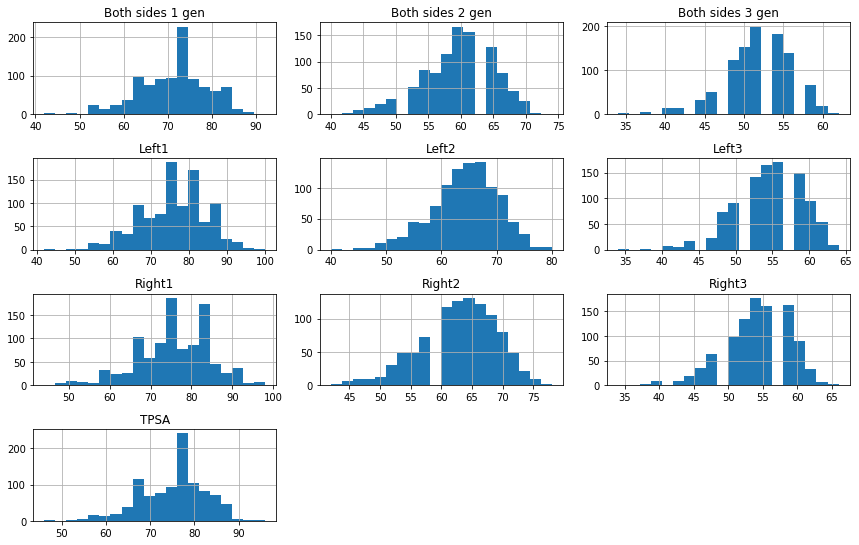

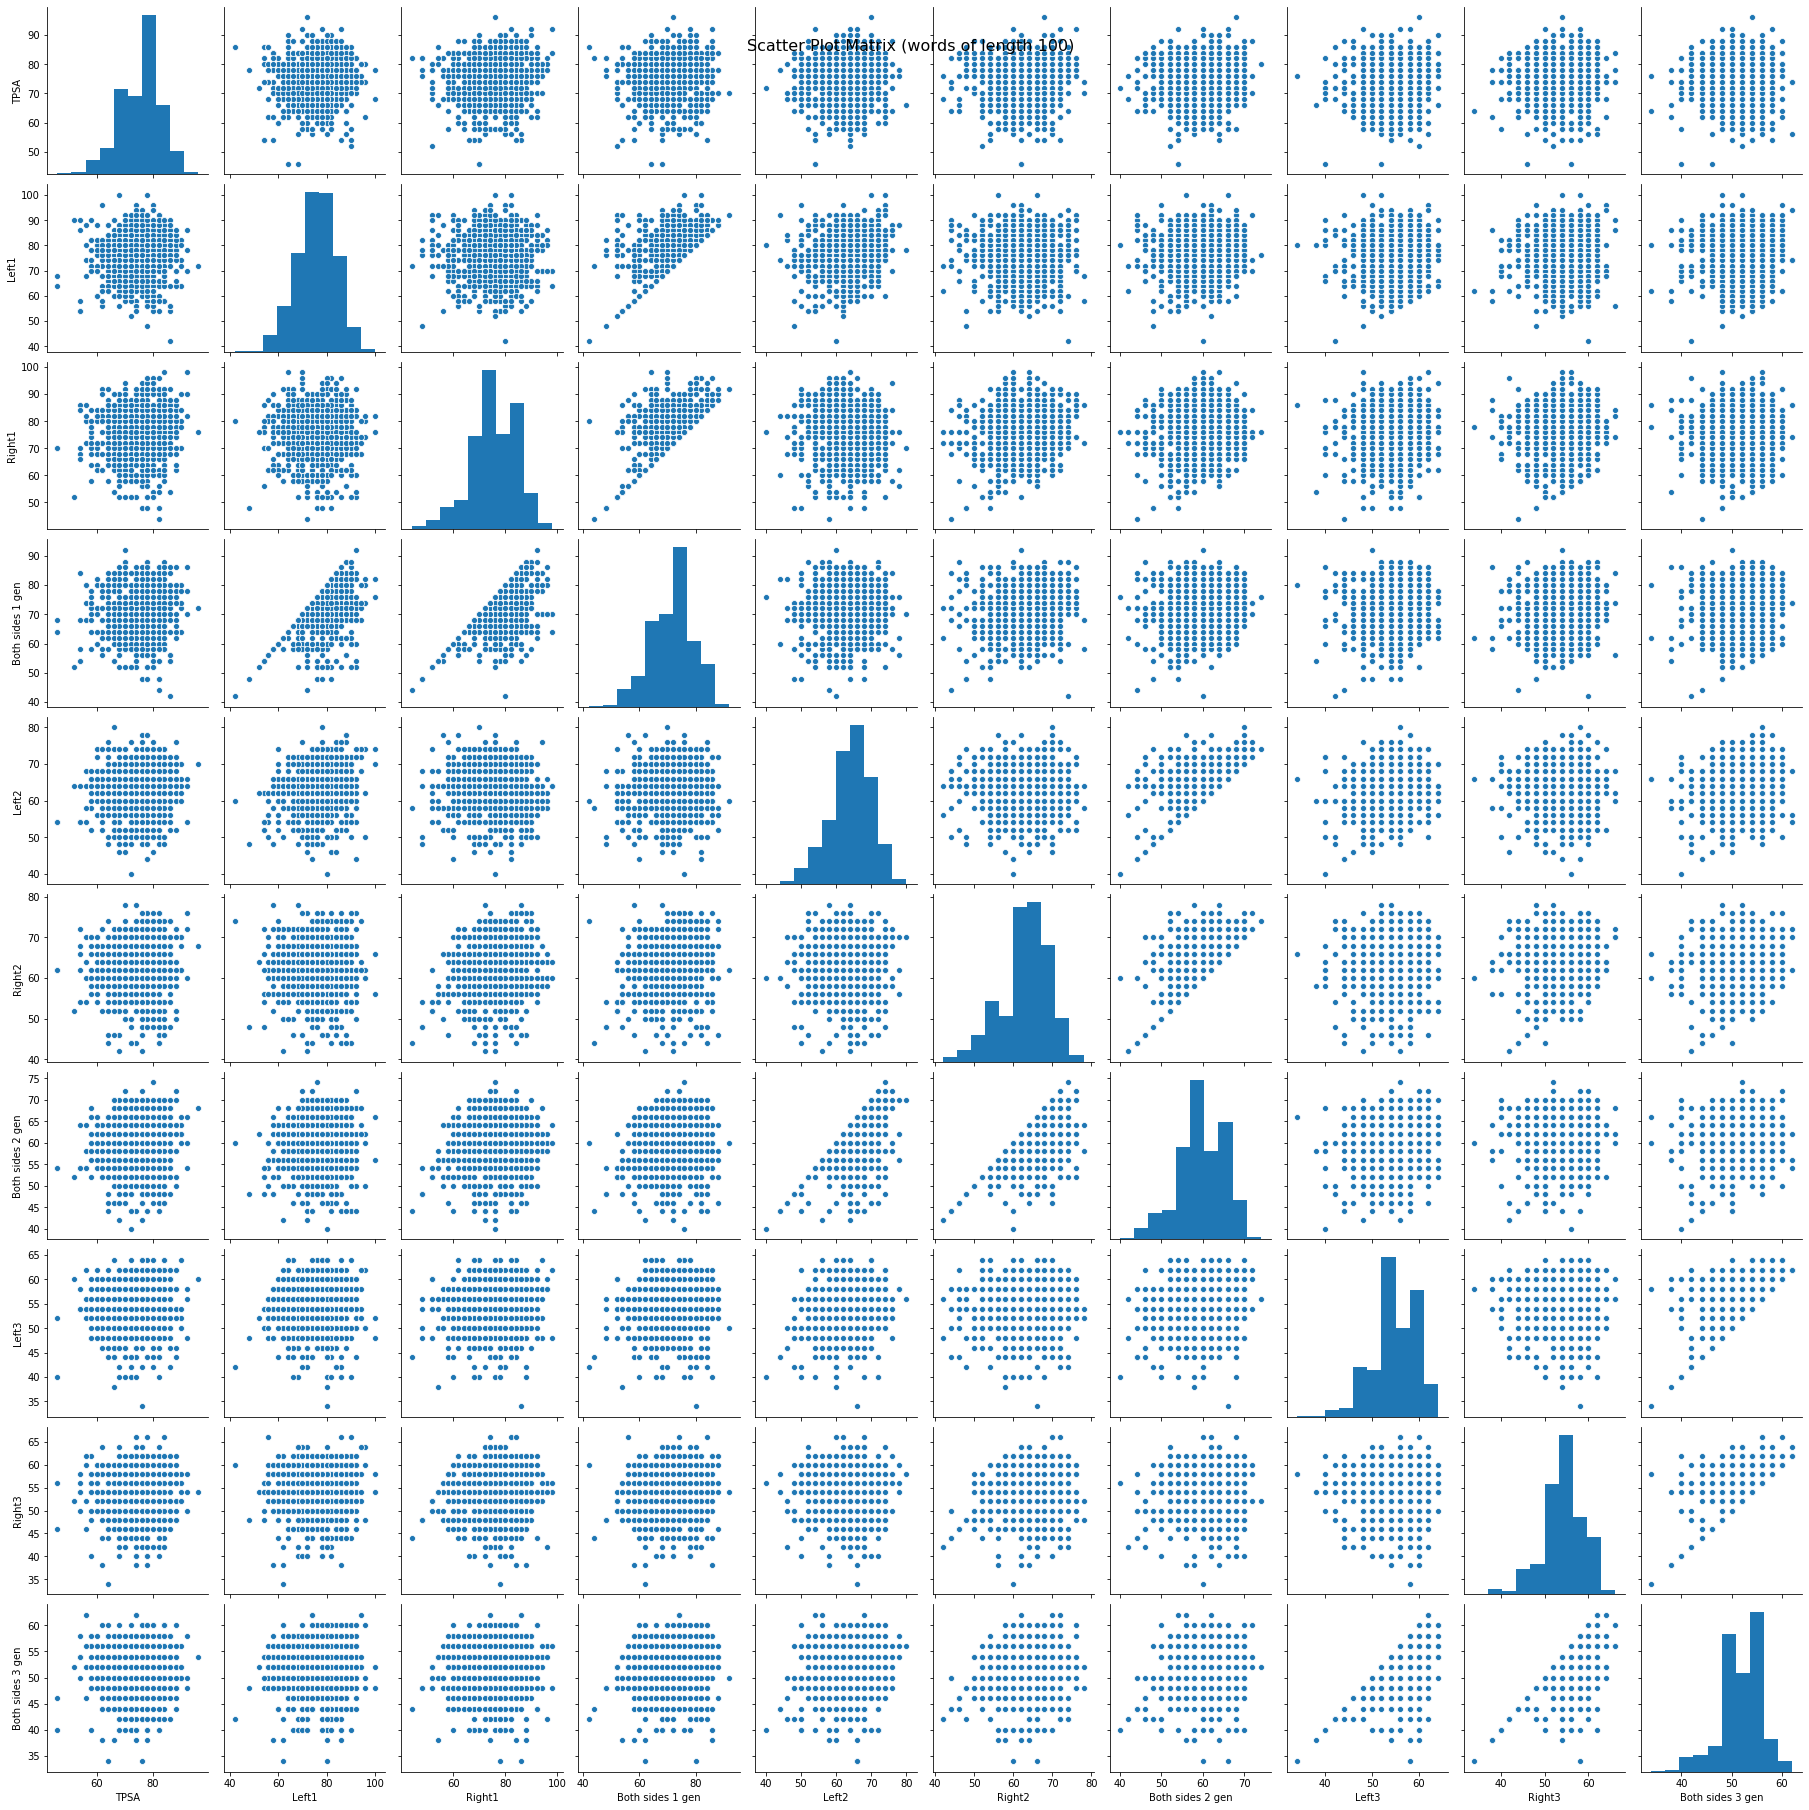

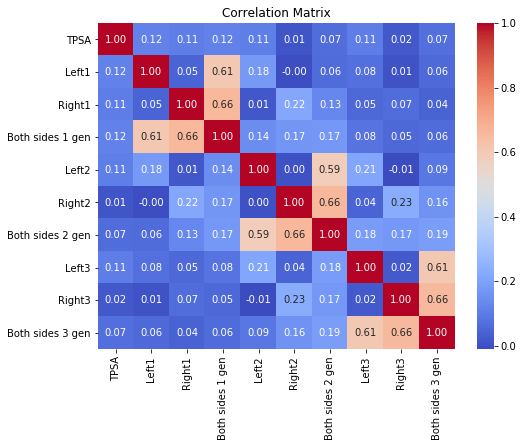

In [44]:
df = pd.DataFrame(data)

# Histograms
df.hist(figsize=(12, 8), bins=20)
#plt.suptitle("Histograms of Word Length Measures", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Pairwise scatter plots
sns.pairplot(df)
plt.suptitle("Scatter Plot Matrix (words of length 100)", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


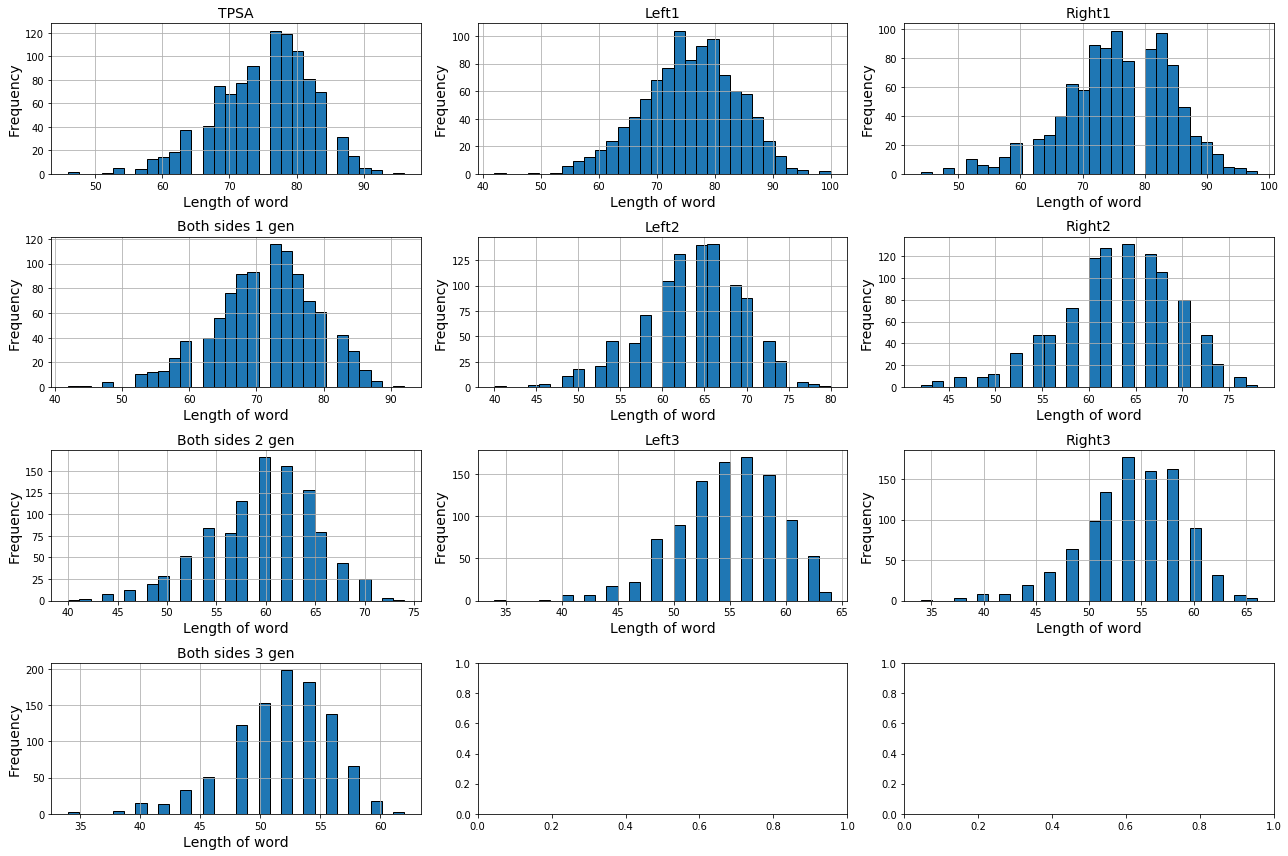

In [136]:
# Create DataFrame
df = pd.DataFrame(data)

# Create subplots: 2 rows x 5 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 12))

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, edgecolor='black')
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel("Length of word", fontsize=14)
    axes[i].set_ylabel("Frequency", fontsize=14)
    axes[i].grid(True)  # Add grid to each subplot
# Adjust layout
plt.tight_layout()
plt.show()

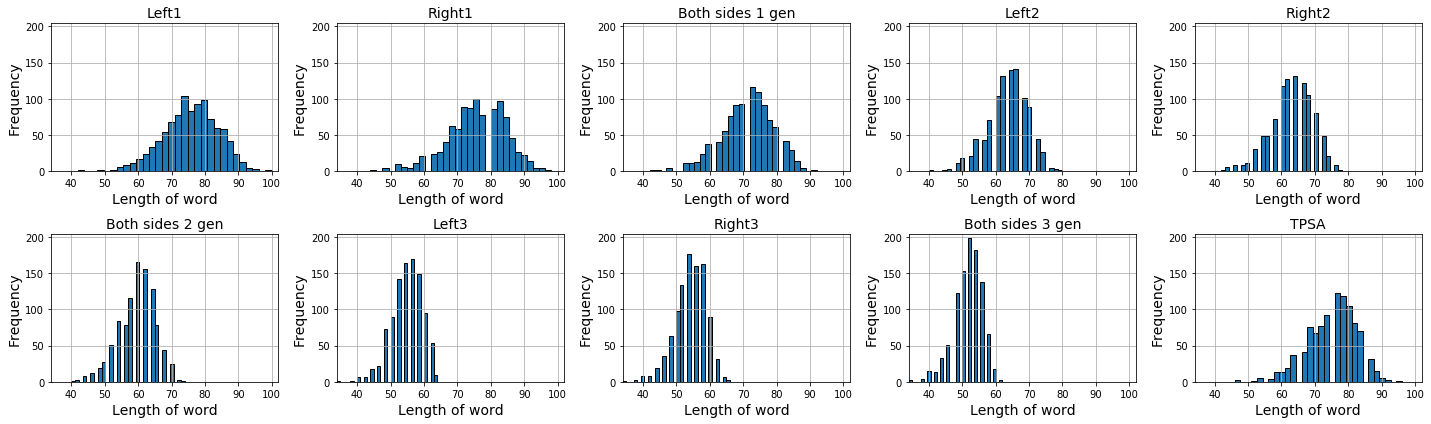

In [112]:
df = pd.DataFrame(data)
# Determine global x and y limits across all columns
x_min = df.min().min()
x_max = df.max().max()+2
y_max = 0
# Precompute maximum y-axis height
for column in df.columns:
    counts, _ = np.histogram(df[column], bins=30)
    y_max = max(y_max, counts.max())+3
# Create subplots: 4 rows x 3 columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 6))
axes = axes.flatten()
# Plot each histogram
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=30, edgecolor='black')
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel("Length of word", fontsize=14)
    axes[i].set_ylabel("Frequency", fontsize=14)
    axes[i].grid(True)
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(0, y_max)

# Hide any unused subplots (if any)
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


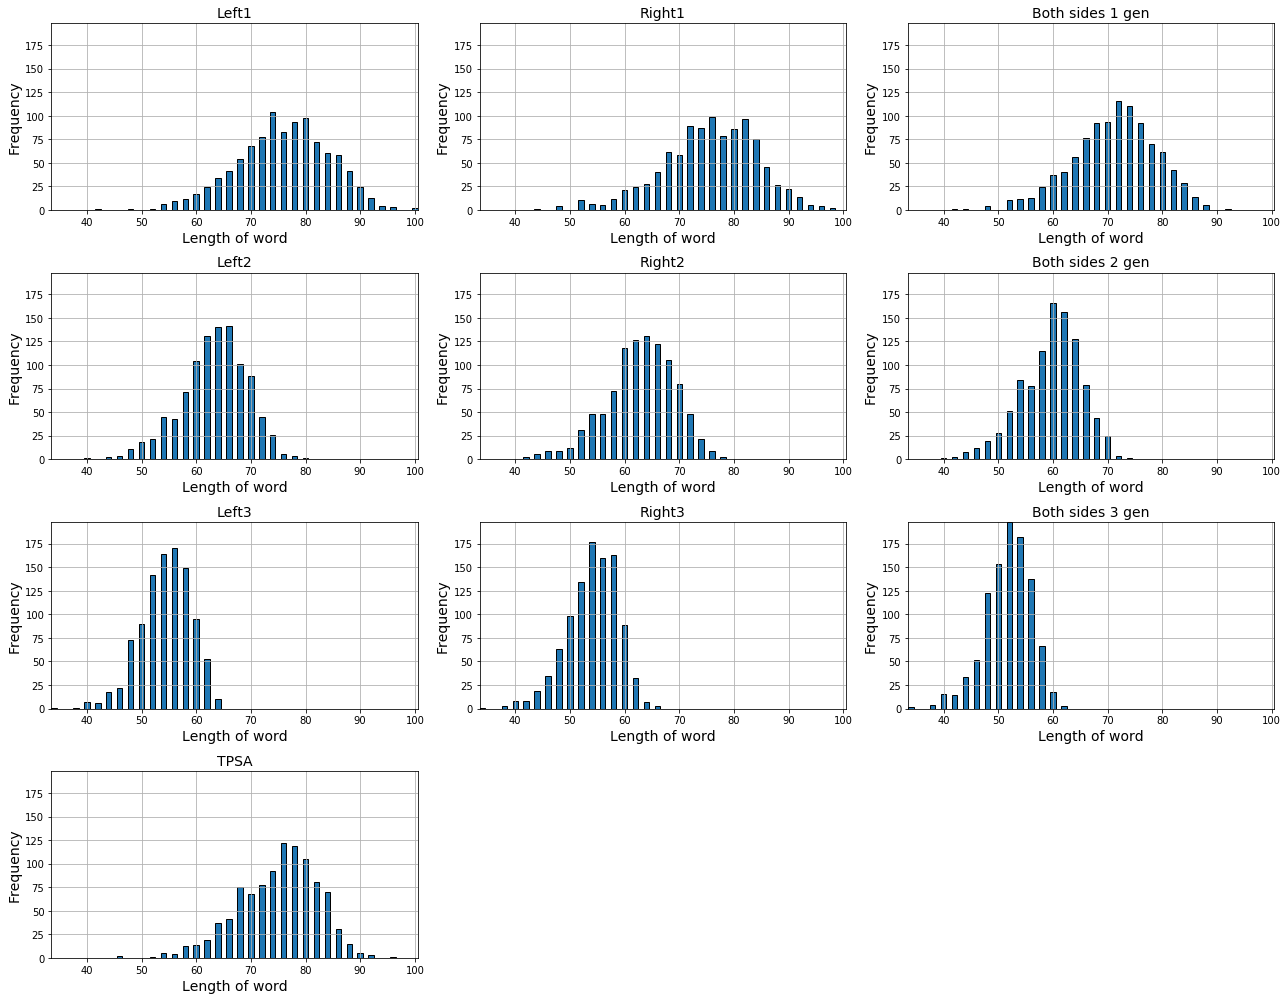

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example: Replace this with your actual data
# data = {...}
df = pd.DataFrame(data)

# Determine global x and y limits
x_min = df.min().min()
x_max = df.max().max()
bins = range(x_min, x_max + 2)  # Integer bins

# Compute maximum y value across all histograms
y_max = 0
for column in df.columns:
    counts, _ = np.histogram(df[column], bins=bins)
    y_max = max(y_max, counts.max())

# Create subplots: 4 rows x 3 columns
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 14))
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(df.columns):
    axes[i].hist(df[column], bins=bins, edgecolor='black', align='left')
    axes[i].set_title(column, fontsize=14)
    axes[i].set_xlabel("Length of word", fontsize=14)
    axes[i].set_ylabel("Frequency", fontsize=14)
    axes[i].grid(True)
    axes[i].set_xlim(x_min - 0.5, x_max + 0.5)
    axes[i].set_ylim(0, y_max)

# Hide any unused subplots (if fewer than 12 columns)
for j in range(len(df.columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


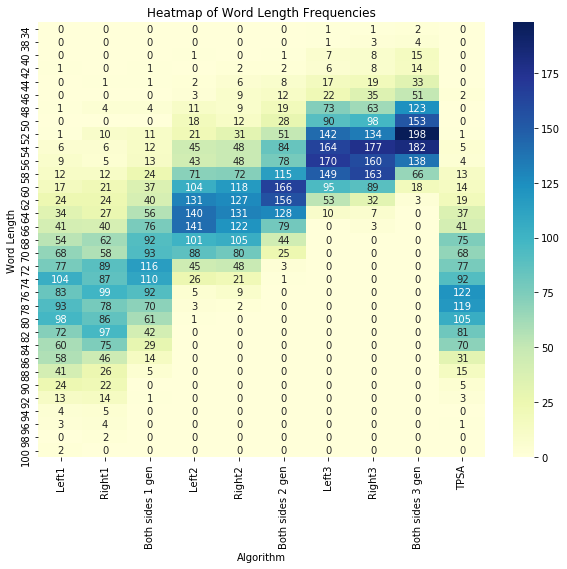

In [111]:
import seaborn as sns

# Count frequency per column per word length
heatmap_df = df.apply(lambda col: col.value_counts()).fillna(0).astype(int).sort_index()

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=True, fmt='d')
plt.title("Heatmap of Word Length Frequencies")
plt.xlabel("Algorithm")
plt.ylabel("Word Length")
plt.show()


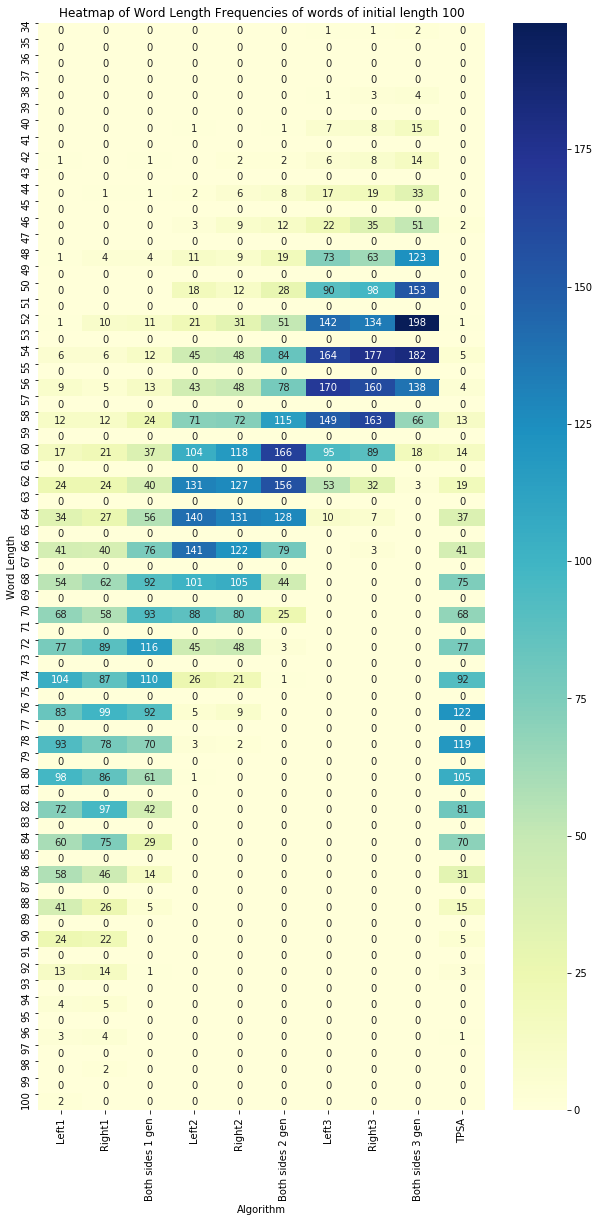

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppose df is already defined
# Obtenir l'ensemble complet des longueurs possibles (par exemple de 0 à 100)
full_index = range(df.min().min(), df.max().max() + 1)

# Créer un DataFrame complet avec toutes les longueurs
heatmap_df = df.apply(lambda col: col.value_counts()).fillna(0).astype(int)
heatmap_df = heatmap_df.reindex(full_index, fill_value=0)

# Tracer la heatmap
plt.figure(figsize=(10, 20))
ax = sns.heatmap(heatmap_df, cmap="YlGnBu", annot=True, fmt='d')

# Afficher chaque entier sur l'axe Y sans saut
ax.set_yticks(range(len(heatmap_df.index)))
ax.set_yticklabels(heatmap_df.index)

plt.title("Heatmap of Word Length Frequencies of words of initial length 100")
plt.xlabel("Algorithm")
plt.ylabel("Word Length")
plt.show()


In [124]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['Right1'], df['Left1'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis — There is dependence.")
else:
    print("Fail to reject the null — The events may be independent.")


Chi-squared Statistic: 773.1203245199848
p-value: 4.494350425293002e-05
Reject the null hypothesis — There is dependence.


In [125]:
# Create contingency table
contingency = pd.crosstab(df['Left2'], df['Right2'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis — There is dependence.")
else:
    print("Fail to reject the null — The events may be independent.")


Chi-squared Statistic: 300.42378733895805
p-value: 0.9488029864739124
Fail to reject the null — The events may be independent.


In [126]:
# Create contingency table
contingency = pd.crosstab(df['Left3'], df['Right3'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency)

print("Chi-squared Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis — There is dependence.")
else:
    print("Fail to reject the null — The events may be independent.")


Chi-squared Statistic: 194.5488132643036
p-value: 0.7705098236803233
Fail to reject the null — The events may be independent.


In [127]:
table = pd.crosstab(df['Left3'], df['Right3'])
print(table)

Right3  34  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66
Left3                                                                 
34       0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
38       0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
40       0   0   0   0   0   0   0   1   0   1   3   1   0   1   0   0
42       0   0   0   0   0   0   1   1   0   2   1   0   1   0   0   0
44       0   0   0   1   2   1   2   0   1   3   1   4   1   1   0   0
46       0   0   0   2   0   3   0   0   7   2   3   2   3   0   0   0
48       0   0   0   1   1   2   6   8  12  15  11   8   8   1   0   0
50       0   0   1   0   3   2   8  11   6  13  20  16   7   2   1   0
52       0   0   2   0   1   8  12   9  20  25  13  28  14   7   3   0
54       0   1   2   0   6   3   9  21  21  34  21  27  12   7   0   0
56       0   0   1   1   1   6   9  19  18  39  25  31  11   6   1   2
58       1   1   0   1   2   4  10  13  17  19  34  26  17   3   1   0
60    

In [128]:
left_set = set(i for i, val in enumerate(Left1) if val == 1000)
right_set = set(i for i, val in enumerate(Right1) if val == 1000)

union = left_set | right_set
union

set()

Initial: mean=100.00, median=100.00, std=0.00
Left1: mean=75.89, median=76.00, std=8.38
Left2: mean=63.26, median=64.00, std=5.96
Left3: mean=54.40, median=54.00, std=4.62
Right1: mean=75.60, median=76.00, std=8.65
Right2: mean=62.84, median=64.00, std=6.23
Right3: mean=54.08, median=54.00, std=4.69
Two pieces: mean=74.98, median=76.00, std=7.22
Both sides 1 gen: mean=71.12, median=72.00, std=7.63
Both sides 2 gen: mean=59.64, median=60.00, std=5.51
Both sides 3 gen: mean=51.71, median=52.00, std=4.27
Mean reduction ratio for Left1: 0.241
Mean reduction ratio for Left2: 0.367
Mean reduction ratio for Left3: 0.456
Mean reduction ratio for Right1: 0.244
Mean reduction ratio for Right2: 0.372
Mean reduction ratio for Right3: 0.459
Mean reduction ratio for Two pieces: 0.250
Mean reduction ratio for Both sides 1 gen: 0.289
Mean reduction ratio for Both sides 2 gen: 0.404
Mean reduction ratio for Both sides 3 gen: 0.483
Wilcoxon test Both sides 1 gen vs Two pieces: stat=97643.5, p-value=2.61

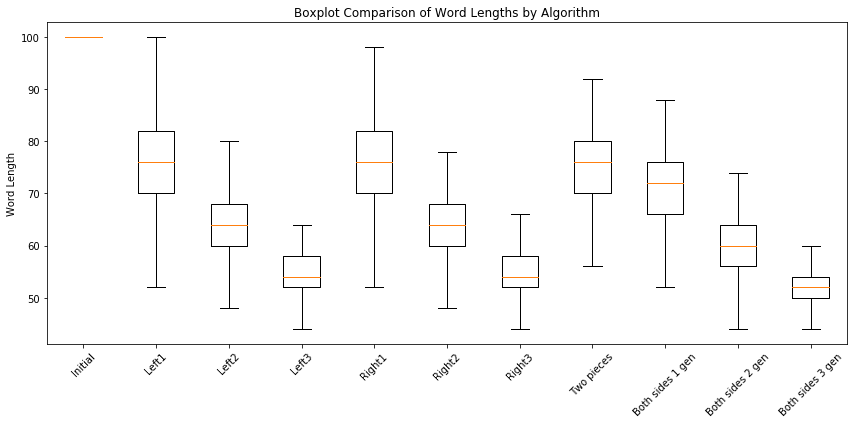

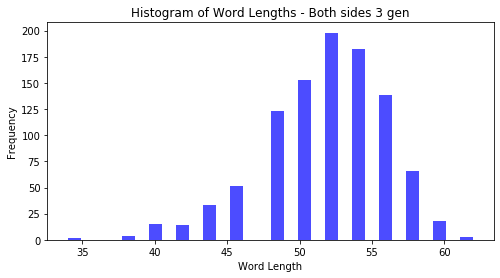

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


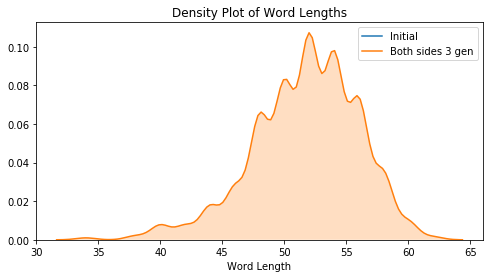

In [130]:
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
import numpy as np

# Assume 'data' dict with your algorithm results (lists or arrays)
# Example keys: 'Initial', 'Left1', 'Left2', ..., 'Both sides 3 gen'

# Calculate and print descriptive statistics for each algorithm
for alg, lengths in data.items():
    mean_len = np.mean(lengths)
    median_len = np.median(lengths)
    std_len = np.std(lengths)
    print(f"{alg}: mean={mean_len:.2f}, median={median_len:.2f}, std={std_len:.2f}")

# Calculate and print mean relative reduction ratios compared to Initial
initial = np.array(data['Initial'])
for alg, lengths in data.items():
    if alg == 'Initial':
        continue
    lengths_arr = np.array(lengths)
    reduction = (initial - lengths_arr) / initial
    print(f"Mean reduction ratio for {alg}: {np.mean(reduction):.3f}")

# Example Wilcoxon signed-rank test between two algorithms
alg1 = np.array(data['Both sides 1 gen'])
alg2 = np.array(data['Two pieces'])
stat, p = wilcoxon(alg1, alg2)
print(f"Wilcoxon test Both sides 1 gen vs Two pieces: stat={stat}, p-value={p:.3e}")

# Boxplot for visual comparison
plt.figure(figsize=(12,6))
plt.boxplot([data[alg] for alg in data.keys()],
            labels=list(data.keys()), showfliers=False)
plt.ylabel('Word Length')
plt.title('Boxplot Comparison of Word Lengths by Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram example for one algorithm (optional)
plt.figure(figsize=(8,4))
plt.hist(data['Both sides 3 gen'], bins=30, alpha=0.7, color='blue')
plt.title('Histogram of Word Lengths - Both sides 3 gen')
plt.xlabel('Word Length')
plt.ylabel('Frequency')
plt.show()

# Density plot example using kernel density estimation (optional)
try:
    import seaborn as sns
    plt.figure(figsize=(8,4))
    for alg in ['Initial', 'Both sides 3 gen']:
        sns.kdeplot(data[alg], label=alg, shade=True)
    plt.title('Density Plot of Word Lengths')
    plt.xlabel('Word Length')
    plt.legend()
    plt.show()
except ImportError:
    print("Seaborn not installed, skipping density plot.")


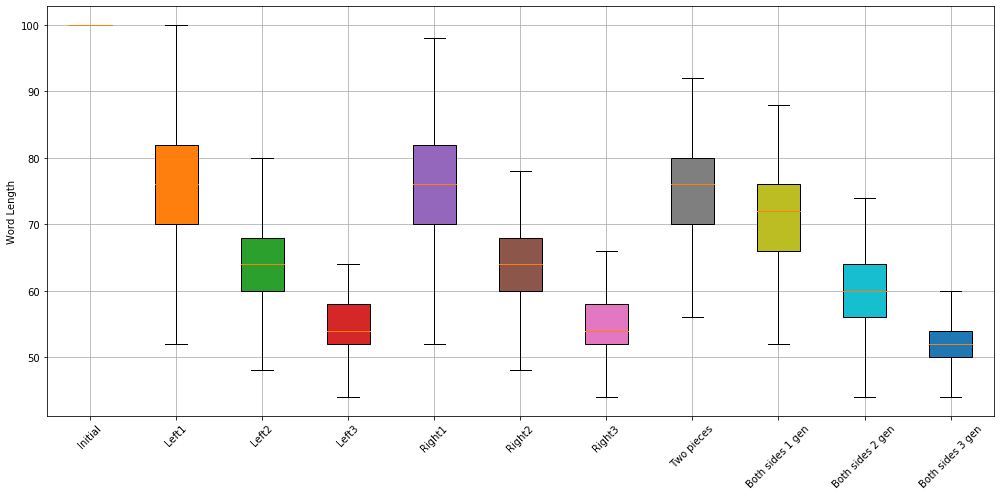

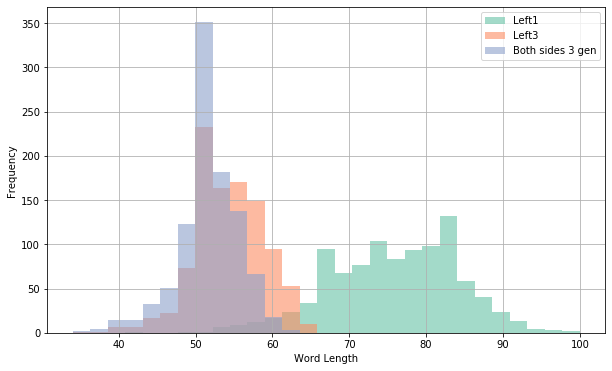

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns  # for nicer color palettes
# List of algorithms to plot
algorithms = list(data.keys())
# Prepare data for boxplot
box_data = [data[alg] for alg in algorithms]
# Use seaborn color palette (or define your own)
palette = sns.color_palette("tab10", n_colors=len(algorithms))
# Boxplot with colors
plt.figure(figsize=(14,7))
box = plt.boxplot(box_data, patch_artist=True, labels=algorithms, showfliers=False)
for patch, color in zip(box['boxes'], palette):
    patch.set_facecolor(color)
plt.ylabel('Word Length')
#plt.title('Comparison of Word Lengths by Algorithm')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
# Histograms for selected algorithms and lengths (example: short, medium, long word sets)
lengths_to_plot = ['Left1', 'Left3', 'Both sides 3 gen']
colors = sns.color_palette("Set2", n_colors=len(lengths_to_plot))
plt.figure(figsize=(10,6))
bins = np.linspace(min(min(data[alg]) for alg in lengths_to_plot),
                   max(max(data[alg]) for alg in lengths_to_plot), 30)
for alg, color in zip(lengths_to_plot, colors):
    plt.hist(data[alg], bins=bins, alpha=0.6, label=alg, color=color)
plt.xlabel('Word Length')
plt.ylabel('Frequency')
#plt.title('Histogram of Word Lengths for Selected Algorithms')
plt.legend()
plt.grid(True)
plt.show()